<a href="https://colab.research.google.com/github/josephinekramer/2022_ML_Earth_Env_Sci/blob/main/Radon_final_analysis_machine_learning_course_Josephine_S__Kramer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Radon_data_final.xlsx to Radon_data_final (30).xlsx
                     Air Press     Rn222
Date/Time                               
2019-01-01 00:00:00      675.0  0.257989
2019-01-01 00:30:00      675.0  0.242724
2019-01-01 01:00:00      675.1  0.219793
2019-01-01 01:30:00      675.3  0.233460
2019-01-01 02:00:00      675.4  0.228849
...                        ...       ...
2021-03-29 20:00:00      679.2  0.687010
2021-03-29 20:30:00      679.1  0.518401
2021-03-29 21:00:00      679.1  0.436957
2021-03-29 21:30:00      679.0  0.470757
2021-03-29 22:00:00      678.9  0.504386

[36997 rows x 2 columns]


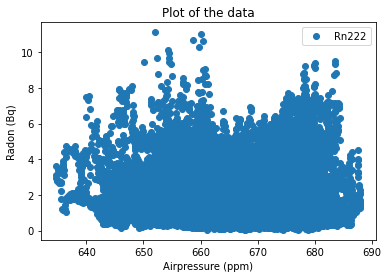

(29597, 1) (29597,)
(7400, 1) (7400,)
-0.0008964949941330236
[-0.00305315]
        Actual  Predicted
0     3.448679   1.806049
1     5.027092   1.818872
2     1.443190   1.828947
3     0.755295   1.825283
4     0.352274   1.807880
...        ...        ...
7395  1.396149   1.817345
7396  1.032943   1.802690
7397  0.340687   1.801774
7398  1.752607   1.833222
7399  0.801856   1.835054

[7400 rows x 2 columns]
Mean Absolute Error: 1.0707462749395638
Mean Squared Error: 1.8991719897901105
Root Mean Squared Error: 1.3781044916079879


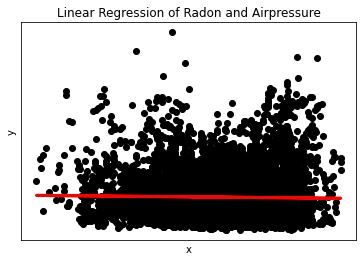

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error: 1.0574492212072717
Mean Squared Error: 1.8495104565406522
Root Mean Squared Error: 1.359967079212086


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.8150039183596023
1.3472208127696077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.8166250896928013
1.3478223509397673


Text(0, 0.5, 'y')

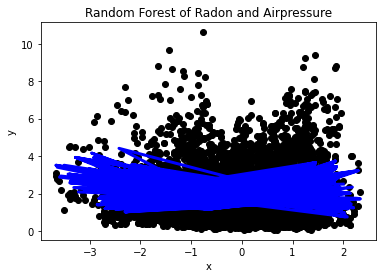

In [36]:
# project start

#first: data import
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline


# create the code
from google.colab import files
 
 
uploaded = files.upload()

### 
import pandas as pd
import io

data = pd.read_excel('Radon_data_final.xlsx',index_col=0, parse_dates=True)
data=pd.DataFrame(data)

data.head()
print(data)
data.columns = data.columns.to_series().apply(lambda x: x.strip())
#data_=data.loc[:,['Air Press','Rn222)']]
#data_.head (39361)
data.plot(x='Air Press', y='Rn222', style='o')
plt.title('Plot of the data')
plt.xlabel('Airpressure (ppm)')
plt.ylabel('Radon (Bq)')
plt.show()

x=pd.DataFrame(data['Air Press'])
y=pd.DataFrame(data['Rn222'])
# analysis 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


#Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test,y_pred, color="red", linewidth=3)
plt.title('Linear Regression of Radon and Airpressure')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(())
plt.yticks(())
plt.show()

#further regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

 # create better parameters
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)
prediction = rf.predict(X_test)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)



{'max_depth': 7,
 'max_features': 'sqrt',
'n_estimators': 300,
 'random_state': 18}
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train, y_train)
# Predict on test data
prediction = rf.predict(X_test)
# Compute mean squared error
mse = metrics.mean_squared_error(y_test, prediction)
# Print results
print(mse)
rmse=mse**.5
print(rmse)



plt.scatter(X_test, y_test, color="black")
plt.plot(X_test,y_pred, color="blue", linewidth=3)
plt.title('Random Forest of Radon and Airpressure')
plt.xlabel('x')
plt.ylabel('y')